<a href="https://colab.research.google.com/github/Maria-Data-Analyst/Amazon_Sales/blob/Consultas-Query/Amazon_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  wordcloud google-cloud-bigquery pandas openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm

In [ ]:
##CODIGO PARA AUTENTICARSE CON GOOGLE
from google.colab import auth
auth.authenticate_user()

## CODIGO PARA VINCULARSE A BIGQUERY
from google.cloud import bigquery

# Configurar el cliente de BigQuery
client = bigquery.Client(project='amazon4-4')
# Definir la consulta para la vista
query = """
SELECT *
FROM `amazon4-4.dataset.consolidado_1`
"""
# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un DataFrame de pandas
df_r = results.to_dataframe()

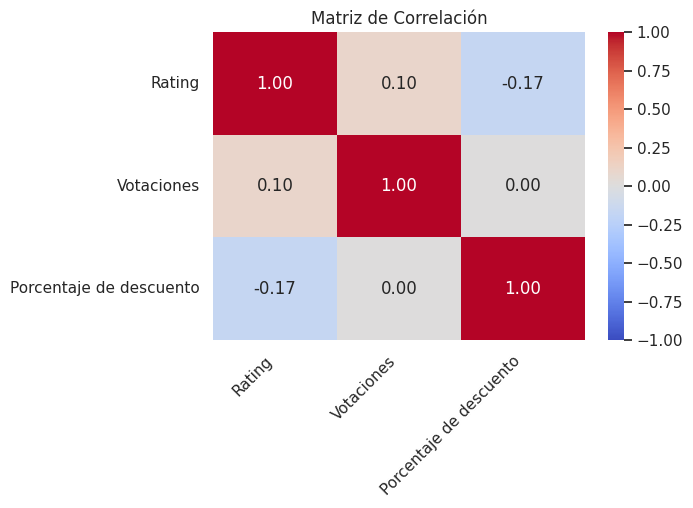

In [ ]:
# Renombrar las columnas para la matriz de correlación
df_r_renamed = df_r[['rating', 'rating_count', 'discount_percentage']].rename(
    columns={
        'rating': 'Rating',
        'rating_count': 'Votaciones',
        'discount_percentage': 'Porcentaje de descuento'
    }
)

# Calcular la matriz de correlación
correlation_matrix = df_r_renamed.corr()

# Configurar el mapa de calor
plt.figure(figsize=(6, 4))  # Tamaño de la figura
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,            # Mostrar los valores de correlación en cada celda
    cmap='coolwarm',       # Mapa de colores de azul claro a rosado
    center=0,              # Centra la escala de colores en 0
    vmin=-1,               # Mínimo valor en la escala de colores
    vmax=1,                # Máximo valor en la escala de colores
    fmt='.2f'              # Formato de los valores en la matriz
)

# Configurar etiquetas de los ejes
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

In [ ]:
# REGRESION LINEAL POR HIPOTESIS

In [ ]:
#### 1 Hipótesis: ¿Los productos con mayores descuentos obtienen mejores calificaciones? ##########

In [ ]:

X = df_r['discount_percentage']  # Variable independiente
y = df_r['rating']  # Variable dependiente

# Agregar una constante a X para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener el resumen simplificado
print("Resumen del Modelo:")
print(f"Intercepto (const): {modelo.params['const']:.4f}")
print(f"Coeficiente (discount_percentage): {modelo.params['discount_percentage']:.4f}")
#print(f"Error estándar (const): {modelo.bse['const']:.4f}")
#print(f"Error estándar (discount_percentage): {modelo.bse['discount_percentage']:.4f}")
print(f"Valor p (discount_percentage): {modelo.pvalues['discount_percentage']:.4f}")
print(f"R-squared: {modelo.rsquared:.4f}")
print(f"Adj. R-squared: {modelo.rsquared_adj:.4f}")


Resumen del Modelo:
Intercepto (const): 4.1976
Coeficiente (discount_percentage): -0.0023
Valor p (discount_percentage): 0.0000
R-squared: 0.0275
Adj. R-squared: 0.0268


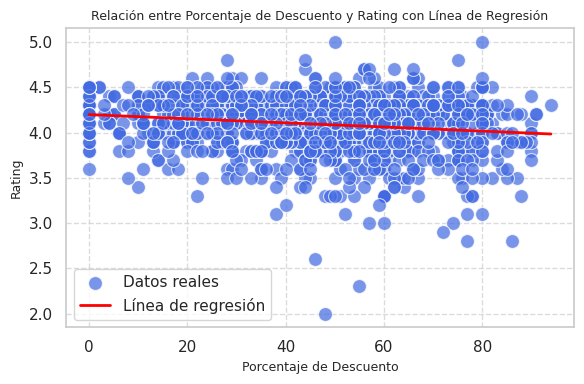

In [ ]:
# Obtener los coeficientes del modelo
intercepto = modelo.params['const']
coeficiente = modelo.params['discount_percentage']

# Configuración del gráfico
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")  # Estilo del gráfico
sns.scatterplot(x='discount_percentage', y='rating', data=df_r, color='royalblue', s=100, edgecolor='w', alpha=0.7, label='Datos reales')

# Añadir la línea de regresión
x_values = np.linspace(df_r['discount_percentage'].min(), df_r['discount_percentage'].max(), 100)
y_values = intercepto + coeficiente * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label='Línea de regresión')

# Personalización de etiquetas y título
plt.xlabel('Porcentaje de Descuento', fontsize=9)
plt.ylabel('Rating', fontsize=9)
plt.title('Relación entre Porcentaje de Descuento y Rating con Línea de Regresión', fontsize=9)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
########## HIPOTESIS 1 :RECHAZADA ############

In [ ]:
######### 2 Hipótesis: ¿Los productos con más votaciones tienen mejores calificaciones?

In [ ]:
# Asignar las variables
X = df_r['rating_count']  # Variable independiente (número de votaciones)
y = df_r['rating']  # Variable dependiente (calificación)

# Agregar una constante a X para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener el resumen simplificado
print("Resumen del Modelo:")
print(f"Intercepto (const): {modelo.params['const']:.4f}")
print(f"Coeficiente (rating_count): {modelo.params['rating_count']:.6f}")
#print(f"Error estándar (const): {modelo.bse['const']:.4f}")
#print(f"Error estándar (rating_count): {modelo.bse['rating_count']:.4f}")
print(f"Valor p (rating_count): {modelo.pvalues['rating_count']:.4f}")
print(f"R-squared: {modelo.rsquared:.4f}")
#print(f"Adj. R-squared: {modelo.rsquared_adj:.4f}")


Resumen del Modelo:
Intercepto (const): 4.0794
Coeficiente (rating_count): 0.000001
Valor p (rating_count): 0.0003
R-squared: 0.0095


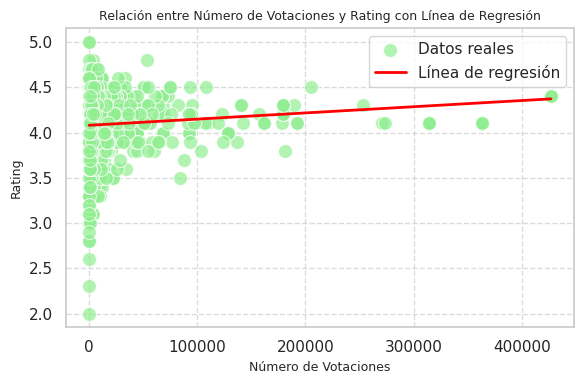

In [ ]:
# Obtener los coeficientes del modelo
intercepto = modelo.params['const']
coeficiente = modelo.params['rating_count']

# Configuración del gráfico
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")  # Estilo del gráfico
sns.scatterplot(x='rating_count', y='rating', data=df_r, color='lightgreen', s=100, edgecolor='w', alpha=0.7, label='Datos reales')

# Añadir la línea de regresión
x_values = np.linspace(df_r['rating_count'].min(), df_r['rating_count'].max(), 100)
y_values = intercepto + coeficiente * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label='Línea de regresión')

# Personalización de etiquetas y título
plt.xlabel('Número de Votaciones', fontsize=9)
plt.ylabel('Rating', fontsize=9)
plt.title('Relación entre Número de Votaciones y Rating con Línea de Regresión', fontsize=9)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
######## HIPOTESIS 2 RECHAZADA ############

In [ ]:
##########  3. Hipótesis: ¿Un mayor descuento está asociado con un mayor número de votaciones del producto?

In [ ]:
# Asignar las variables
X = df_r['discount_percentage']  # Variable independiente (porcentaje de descuento)
y = df_r['rating_count']  # Variable dependiente (número de votaciones)

# Agregar una constante a X para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener el resumen simplificado
print("Resumen del Modelo:")
print(f"Intercepto (const): {modelo.params['const']:.4f}")
print(f"Coeficiente (discount_percentage): {modelo.params['discount_percentage']:.4f}")
#print(f"Error estándar (const): {modelo.bse['const']:.4f}")
#print(f"Error estándar (discount_percentage): {modelo.bse['discount_percentage']:.4f}")
print(f"Valor p (discount_percentage): {modelo.pvalues['discount_percentage']:.4f}")
print(f"R-squared: {modelo.rsquared:.4f}")
#print(f"Adj. R-squared: {modelo.rsquared_adj:.4f}")

Resumen del Modelo:
Intercepto (const): 17261.3038
Coeficiente (discount_percentage): 8.1216
Valor p (discount_percentage): 0.8798
R-squared: 0.0000


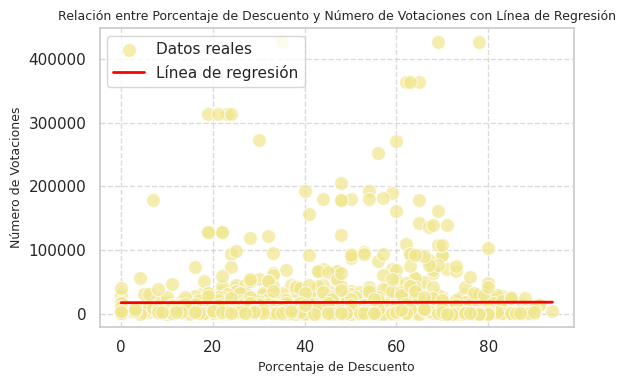

In [ ]:
# Asignar las variables
X = df_r['discount_percentage']  # Variable independiente (porcentaje de descuento)
y = df_r['rating_count']  # Variable dependiente (número de votaciones)

# Agregar una constante a X para el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener los coeficientes del modelo
intercepto = modelo.params['const']
coeficiente = modelo.params['discount_percentage']

# Configuración del gráfico
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")  # Estilo del gráfico
sns.scatterplot(x='discount_percentage', y='rating_count', data=df_r, color='khaki', s=100, edgecolor='w', alpha=0.7, label='Datos reales')

# Añadir la línea de regresión
x_values = np.linspace(df_r['discount_percentage'].min(), df_r['discount_percentage'].max(), 100)
y_values = intercepto + coeficiente * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label='Línea de regresión')

# Personalización de etiquetas y título
plt.xlabel('Porcentaje de Descuento', fontsize=9)
plt.ylabel('Número de Votaciones', fontsize=9)
plt.title('Relación entre Porcentaje de Descuento y Número de Votaciones con Línea de Regresión', fontsize=9)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
##### REGRESION LINEAL GENERAL

In [ ]:
##CODIGO PARA AUTENTICARSE CON GOOGLE
from google.colab import auth
auth.authenticate_user()

## CODIGO PARA VINCULARSE A BIGQUERY
from google.cloud import bigquery

# Configurar el cliente de BigQuery
client = bigquery.Client(project='amazon4-4')
# Definir la consulta para la vista
query = """
SELECT *
FROM `amazon4-4.dataset.consolidado_1`
"""
# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un DataFrame de pandas
df_r = results.to_dataframe()

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1339 non-null   object 
 1   product_name          1339 non-null   object 
 2   category              1339 non-null   object 
 3   main_category         1339 non-null   object 
 4   second_category       1339 non-null   object 
 5   other_categories      1331 non-null   object 
 6   discounted_price      1339 non-null   float64
 7   actual_price          1339 non-null   float64
 8   discount_percentage   1339 non-null   float64
 9   rating                1339 non-null   float64
 10  rating_count          1339 non-null   float64
 11  link_corregido_final  880 non-null    object 
 12  imagen_unica          879 non-null    object 
 13  img_general           879 non-null    object 
 14  product_link          880 non-null    object 
dtypes: float64(5), object

In [ ]:
dummies=pd.get_dummies(df_r["main_category"], dtype= int)

In [ ]:
df_r =df_r.join(dummies)

In [ ]:
df_r.head()

,product_id,product_name,category,main_category,second_category,other_categories,discounted_price,actual_price,discount_percentage,rating,...,product_link,Car&Motorbike,Computers&Accessories,Electronics,Health&PersonalCare,Home&Kitchen,HomeImprovement,MusicalInstruments,OfficeProducts,Toys&Games
0,B01F7B2JCI,Dynore Stainless Steel Set of 4 Measuring Cup ...,"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",Home&Kitchen,Kitchen&HomeAppliances,"Coffee,Tea&Espresso|CoffeeMakerAccessories|Mea...",184.0,450.0,59.0,4.2,...,None,0,0,0,0,1,0,0,0,0
1,B015GX9Y0W,Lifelong LLWM105 750-Watt Belgian Waffle Maker...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances|WaffleMakers&Irons,1199.0,2400.0,50.0,3.9,...,None,0,0,0,0,1,0,0,0,0
2,B08CYNJ5KY,HP 682 Black Original Ink Cartridge,"Computers&Accessories|Printers,Inks&Accessorie...",Computers&Accessories,"Printers,Inks&Accessories","Inks,Toners&Cartridges|InkjetInkCartridges",828.0,861.0,4.0,4.2,...,https://www.amazon.in/682-Black-Original-Ink-C...,0,1,0,0,0,0,0,0,0
3,B09CTWFV5W,"PHILIPS Air Fryer HD9200/90, uses up to 90% le...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances|DeepFatFryers|AirFryers,7199.0,9995.0,28.0,4.4,...,None,0,0,0,0,1,0,0,0,0
4,B01J1CFO5I,Redgear MP35 Speed-Type Gaming Mousepad (Black...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,PCGamingPeripherals|Gamepads,299.0,550.0,46.0,4.6,...,https://www.amazon.in/Redgear-MP35-Speed-Type-...,0,1,0,0,0,0,0,0,0


In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             1339 non-null   object 
 1   product_name           1339 non-null   object 
 2   category               1339 non-null   object 
 3   main_category          1339 non-null   object 
 4   second_category        1339 non-null   object 
 5   other_categories       1331 non-null   object 
 6   discounted_price       1339 non-null   float64
 7   actual_price           1339 non-null   float64
 8   discount_percentage    1339 non-null   float64
 9   rating                 1339 non-null   float64
 10  rating_count           1339 non-null   float64
 11  link_corregido_final   880 non-null    object 
 12  imagen_unica           879 non-null    object 
 13  img_general            879 non-null    object 
 14  product_link           880 non-null    object 
 15  Car&

In [ ]:
df_r=df_r.drop(["category","product_id","product_name",
                        "main_category","second_category","other_categories","Car&Motorbike","HomeImprovement",
                        "Toys&Games","MusicalInstruments","Health&PersonalCare","link_corregido_final","imagen_unica","img_general","product_link"], axis=1)

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   discounted_price       1339 non-null   float64
 1   actual_price           1339 non-null   float64
 2   discount_percentage    1339 non-null   float64
 3   rating                 1339 non-null   float64
 4   rating_count           1339 non-null   float64
 5   Computers&Accessories  1339 non-null   int64  
 6   Electronics            1339 non-null   int64  
 7   Home&Kitchen           1339 non-null   int64  
 8   OfficeProducts         1339 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 94.3 KB


In [ ]:
df_r.corr()["rating"].sort_values(ascending=False)

,rating
rating,1.000000
Computers&Accessories,0.132730
discounted_price,0.128038
actual_price,0.127395
OfficeProducts,0.113517
rating_count,0.097651
Electronics,-0.038954
Home&Kitchen,-0.121459
discount_percentage,-0.165797


In [ ]:
#Separar las caracteristicas de la etiqueta
X= df_r.drop(["rating"],axis=1)
y= df_r["rating"]

In [ ]:
#Separa los datos en 2 partes: conjunto de entrenamiento y uno de pruebas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_ent, X_pru, y_ent, y_pru = train_test_split(X,y,test_size=.2)
modelo=LinearRegression()
modelo.fit(X_ent, y_ent)

LinearRegression()

In [ ]:
predicciones = modelo.predict (X_pru)

In [ ]:
comparativa = {"Prediccion": predicciones, "Valores Real": y_pru}
pd.DataFrame(comparativa)

,Prediccion,Valores Real
1154,3.902437,3.7
1234,4.043056,4.2
215,4.087107,4.0
1129,4.103079,4.1
1191,3.936274,2.9
...,...,...
369,4.021943,3.8
346,4.021339,4.1
302,4.141131,4.1
1293,4.035693,3.9


In [ ]:
print("Longitud de y_pru:", len(y_pru))
print("Longitud de predicciones:", len(predicciones))

Longitud de y_pru: 268
Longitud de predicciones: 268


In [ ]:
# Overfitting (sobreajuste)
entrenamiento_score = modelo.score(X_ent, y_ent)
prueba_score = modelo.score(X_pru, y_pru)

print("Score en el conjunto de entrenamiento:", entrenamiento_score)
print("Score en el conjunto de prueba:", prueba_score)


Score en el conjunto de entrenamiento: 0.10382144659191439
Score en el conjunto de prueba: 0.09496071377593962


In [ ]:
#  Error Cuadrático Medio
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pru, predicciones)
print("Error Cuadrático Medio",mse)
# Raíz del Error Cuadrático Medio
rmse = np.sqrt(mse)
print("Raíz del Error Cuadrático Medio",rmse)

Error Cuadrático Medio 0.08225293000607288
Raíz del Error Cuadrático Medio 0.28679771618001576
